# 📚 **Shakespeare-Hamlet Next Word Prediction using LSTM** 🎭

Welcome to the **Shakespeare-Hamlet Next Word Prediction** project! This project utilizes an LSTM (Long Short-Term Memory) neural network to predict the next word in a sequence based on the text of *Hamlet* by William Shakespeare. The goal is to generate Shakespearean text using an AI model trained on the play’s data.

## 🧠 **Objective:**
Use deep learning with an LSTM model to predict the next word in Shakespeare's *Hamlet* text. By providing a seed phrase, the model will predict and complete the next words in Shakespearean style! ✨

---


## 🔧 **Project Setup**

### 1. **Load the Text (Hamlet) 📜:**

In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

In [5]:
tf.__version__

'2.15.0'

In [6]:
with open('shakespeare-hamlet.txt', 'r') as file:
    docs = file.read()

In [7]:
print(docs[:500])

[The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo and Francisco two Centinels.

  Barnardo. Who's there?
  Fran. Nay answer me: Stand & vnfold
your selfe

   Bar. Long liue the King

   Fran. Barnardo?
  Bar. He

   Fran. You come most carefully vpon your houre

   Bar. 'Tis now strook twelue, get thee to bed Francisco

   Fran. For this releefe much thankes: 'Tis bitter cold,
And I am sicke at heart

   Barn. Haue you had quiet Guard?
  Fran. Not



### 2. **Tokenization & Sequence Generation 🔠:**
Convert the text into sequences of words so that the model can learn the next-word prediction based on previous context.

In [8]:
tokenizer = Tokenizer()

In [9]:
tokenizer.fit_on_texts([docs])

In [10]:
vocab_size = len(tokenizer.word_index) + 1  # Add 1 because word_index starts from 1, but embedding expects from 0
print("Vocabulary size:", vocab_size)

Vocabulary size: 4818


In [11]:
# Inspect the word associated with index 4817 (for verification)
for word, index in tokenizer.word_index.items():
    if index == 4817:
        print(word)

finis


In [12]:
# Creating input sequences for training
input_seq = []
for sentence in docs.split("\n"):
    tokenized_sent = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(tokenized_sent)):
        input_seq.append(tokenized_sent[: i + 1])

In [13]:
input_seq[:10]

[[1, 687],
 [1, 687, 4],
 [1, 687, 4, 45],
 [1, 687, 4, 45, 41],
 [1, 687, 4, 45, 41, 1886],
 [1, 687, 4, 45, 41, 1886, 1887],
 [1, 687, 4, 45, 41, 1886, 1887, 1888],
 [1180, 1889],
 [1180, 1889, 1890],
 [1180, 1889, 1890, 1891]]

In [14]:
# Padding the sequences to the maximum length in the dataset
max_seq_length = max([len(x) for x in input_seq])
padded_input_sequence = pad_sequences(input_seq, maxlen=max_seq_length, padding="pre")

In [15]:
padded_input_sequence[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
       687])

In [16]:
# Splitting input and output sequences
X = padded_input_sequence[:, :-1]
y = padded_input_sequence[:, -1]

In [17]:
X[0],y[0]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]), 687)

In [18]:
# One-hot encoding the output labels (y)
y = to_categorical(y, num_classes=vocab_size)

In [19]:
y[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)


### 3. **Build the LSTM Model 🧩:**
We use a Sequential model with an Embedding layer followed by an LSTM layer and a Dense output layer.

In [20]:
# Model Architecture
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100))
model.add(LSTM(100)) 
model.add(Dense(vocab_size, activation='softmax'))

In [21]:
# Model Compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         481800    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 4818)              486618    
                                                                 
Total params: 1048818 (4.00 MB)
Trainable params: 1048818 (4.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
history=model.fit(X, y, epochs=100)

Epoch 1/100


805/805 [==============================] - 19s 20ms/step - loss: 6.8500 - accuracy: 0.0358
Epoch 2/100
805/805 [==============================] - 18s 23ms/step - loss: 6.4276 - accuracy: 0.0442
Epoch 3/100
805/805 [==============================] - 14s 18ms/step - loss: 6.2273 - accuracy: 0.0565
Epoch 4/100
805/805 [==============================] - 14s 18ms/step - loss: 5.9783 - accuracy: 0.0751
Epoch 5/100
805/805 [==============================] - 18s 22ms/step - loss: 5.7092 - accuracy: 0.0905
Epoch 6/100
805/805 [==============================] - 14s 17ms/step - loss: 5.4531 - accuracy: 0.1014
Epoch 7/100
805/805 [==============================] - 13s 16ms/step - loss: 5.2144 - accuracy: 0.1158
Epoch 8/100
805/805 [==============================] - 13s 16ms/step - loss: 4.9924 - accuracy: 0.1260
Epoch 9/100
805/805 [==============================] - 14s 17ms/step - loss: 4.7764 - accuracy: 0.1402
Epoch 10/100
805/805 [==============================] - 14s 17ms/step -

## 📊 **Plot Training Loss & Accuracy 📈:**
Visualize the model’s performance during training.

In [31]:
# Extract loss and accuracy values from the history object
loss = history.history['loss']
accuracy = history.history['accuracy']

epochs = range(1, len(loss) + 1)

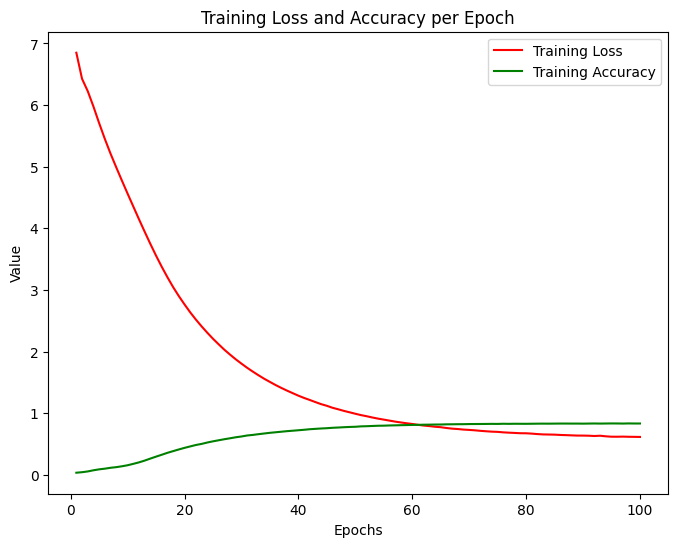

In [32]:
plt.figure(figsize=(8, 6))

plt.plot(epochs, loss, 'r', label='Training Loss') 
plt.plot(epochs, accuracy, 'g', label='Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training Loss and Accuracy per Epoch')
plt.legend()

plt.show()

In [33]:
model.evaluate(X,y)

805/805 [==============================] - 8s 9ms/step - loss: 0.5614 - accuracy: 0.8498


[0.5614160299301147, 0.8497979044914246]


## 📝 **Next Word Prediction Function:**
You can now predict what comes next in Hamlet’s iconic lines! 🎬

---

In [38]:
def prediction(text:str, n_word:int)->str:
    """
    Predict the next 'n_word' words based on the input 'text'.
    
    Args:
    text (str): The input text to seed the prediction.
    n_word (int): The number of words to predict and append.
    
    Returns:
    str: The input text appended with the predicted words.
    """
    
    for _ in range(n_word):
        # Convert the input text to sequences (tokenized)
        token_text = tokenizer.texts_to_sequences([text])[0]
        
        # Pad the sequence to the max sequence length expected by the model
        padded_token_input = pad_sequences([token_text], maxlen=max_seq_length, padding="pre")
        
        # Predict the probabilities for the next word
        output_prob = model.predict(padded_token_input, verbose=0)
        
        # Find the word with the highest probability
        pos = np.argmax(output_prob)
        
        # Map the predicted index back to the corresponding word
        for word, index in tokenizer.word_index.items():
            if index == pos:
                # Append the predicted word to the input text
                text = text + " " + word
                break
    
    return text


In [39]:
text="You come most"
n_word=1
prediction(text,n_word)

'You come most carefully'

In [41]:
text="God blesse"
n_word=2
prediction(text,n_word)

'God blesse you sir'

In [49]:
text="The Tragedie of Hamlet"
n_word=4
prediction(text,n_word)

'The Tragedie of Hamlet by william shakespeare 1599'

## 🔥 **Conclusion:**
- This project demonstrates how an LSTM model can be used to predict the next word in a sequence, using *Hamlet* as training data.
- The model can generate authentic-looking Shakespearean text based on the input sequence, providing a unique exploration into the world of natural language generation!
